In [1]:
import numpy as np
import pandas as pd
import string
from scipy.spatial import distance
import math 
import csv
import matplotlib.pyplot as mplot

## 1. Convert the list of 26 letters of the alphabet to the index of the Dataframe, and assign 26 random integer numbers. Print out the first 5 rows. 

In [2]:
d=np.random.randint(0,100,size=(26))
li=d.tolist() 
alphabets=string.ascii_uppercase
data = dict(zip(li, alphabets))
sorted_x = sorted(data.items(), key=lambda kv:kv[1])
output=pd.DataFrame(sorted_x)
output=output.set_index(1)
output.columns =['integers']
output.index.names = ['index']
output

,integers
index,
A,98
B,36
C,20
D,33
E,99
F,55
G,6
H,56
J,41


In [3]:
firstFiveRows = output.iloc[:5]
firstFiveRows

,integers
index,
A,98
B,36
C,20
D,33
E,99


## 2. Construct the following DataFrame and print it out. Use "iloc" to convert the first column of this DataFrame as a Series. [3 points]

In [4]:
dataFrame = {'class1':[1,2,3,4,7,11],
             'class2':[4,5,6,9,5,0],
             'class3':[7,5,8,12,1,11]}
output = pd.DataFrame(dataFrame)
output


,class1,class2,class3
0,1,4,7
1,2,5,5
2,3,6,8
3,4,9,12
4,7,5,1
5,11,0,11


In [5]:
result=output.iloc[:,0]
print(type(result))
result

<class 'pandas.core.series.Series'>


0     1
1     2
2     3
3     4
4     7
5    11
Name: class1, dtype: int64


  ## 3.  Work on the above data (question 2), implement the following tasks using indexers loc and/or iloc:   [total 6 points]

(1) Select all columns, except one given column 'class3', and print out the result.

(2) Remove first 3 rows of the DataFrame and print it out.

(3) Remove last 3 rows of the DataFrame and print it out.

In [6]:
dataFrame = {'class1':[1,2,3,4,7,11],
             'class2':[4,5,6,9,5,0],
             'class3':[7,5,8,12,1,11]}
output = pd.DataFrame(dataFrame)
output
##1
FirstOutput=pd.DataFrame(output,columns=['class1','class2'])
FirstOutput

,class1,class2
0,1,4
1,2,5
2,3,6
3,4,9
4,7,5
5,11,0


In [7]:
##2
secondOutput = output.iloc[3:]
secondOutput

,class1,class2,class3
3,4,9,12
4,7,5,1
5,11,0,11


In [8]:
##3
thirdOutput = output.iloc[:3]
thirdOutput

,class1,class2,class3
0,1,4,7
1,2,5,5
2,3,6,8



   ## 4. Two series: [total 6 points]

ser1 = pd.Series([1, 2, 3, 4, 5])

ser2 = pd.Series([4, 5, 6, 7, 8])

(1) From ser1 remove items present in ser2.

(2) Get all items of ser1 and ser2 not common to both.

In [9]:
##1
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

outputPart1=ser1[~ser1.isin(ser2)]
outputPart1

0    1
1    2
2    3
dtype: int64

In [10]:
##2
unionOfSeries=pd.Series(np.union1d(ser1, ser2))
interSectionOfSeries=pd.Series(np.intersect1d(ser1, ser2))
outputPart2=unionOfSeries[~unionOfSeries.isin(interSectionOfSeries)]
outputPart2

0    1
1    2
2    3
5    6
6    7
7    8
dtype: int64


 ## 5. Compute the Euclidean distance between two series (points) p1 and p2: (1) using a calculation formula ref the link; (2) using a built-in function. [total 6 points]

Ref: https://en.wikipedia.org/wiki/Euclidean_distance (Links to an external site.)

p1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

p2 = pd.Series([8, 9, 10, 11, 12, 7, 6, 5, 4, 3])

In [11]:
p1 = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p2 = pd.Series([8, 9, 10, 11, 12, 7, 6, 5, 4, 3])

##1 
distanceOutput = np.sqrt(np.sum([(a-b)*(a-b) for a, b in zip(p1, p2)]))
print(distanceOutput)
##2
output=distance.euclidean(p1,p2)
print(output)
desiredOutput=np.linalg.norm(p1-p2)
print(desiredOutput)

18.16590212458495
18.16590212458495
18.16590212458495



 ## 6. Create a new column such that, each row contains the row number of the farthest row-record by Euclidean distance. [8 points]

Input:

np.random.seed(42)

df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))

df

Desired Output: ["distance" retains 2 digits after the decimal point.]

In [12]:
np.random.seed(42)

df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))

farthest_row =[]
dis = []
print(df)
for idx in df.index:
    
    a = df.loc[str(idx)]
    row = '0'
    temp = 0.0
    for otr in df.index:
        b = df.loc[str(otr)]
        if temp < distance.euclidean(a,b):
            temp = round(distance.euclidean(a,b),2)
            row = otr
    dis.append(temp)
    farthest_row.append(row)

df['farthest_row']=farthest_row
df['distance'] = dis

df

    p   q   r   s
a  52  93  15  72
b  61  21  83  87
c  75  75  88  24
d   3  22  53   2
e  88  30  38   2
f  64  60  21  33
g  76  58  22  89
h  49  91  59  42
i  92  60  80  15
j  62  62  47  62


,p,q,r,s,farthest_row,distance
a,52,93,15,72,d,117.41
b,61,21,83,87,d,107.19
c,75,75,88,24,d,98.50
d,3,22,53,2,g,123.11
e,88,30,38,2,a,103.41
f,64,60,21,33,b,91.05
g,76,58,22,89,d,123.11
h,49,91,59,42,d,92.27
i,92,60,80,15,d,101.31
j,62,62,47,62,d,93.36


## 7. Create a dataframe with rows as strides from a given series: L = pd.Series(range(15))     [6 points]

Desired Output:

array([[ 0,  1,  2,  3],

       [ 2,  3,  4,  5],

       [ 4,  5,  6,  7],

       [ 6,  7,  8,  9],

       [ 8,  9, 10, 11],

       [10, 11, 12, 13]])

In [13]:
L = pd.Series(range(15))

def gen_strides(data, strideLength=5, windowLength=5):
    n_strides = ((data.size-windowLength)//strideLength) + 1
    return np.array([data[s:(s+windowLength)] for s in np.arange(0, data.size, strideLength)[:n_strides]])

gen_strides(L, strideLength=2, windowLength=4)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

## 8. In df, (1) interchange columns 'a' and 'c'; [2 points] (2) Create a generic function to interchange two columns [without hardcoding column names]; [4 points] (3) Sort the columns in reverse alphabetical order, that is colume 'e' first through column 'a' last. [2 points]      [total 8 points]

In [14]:
dataFrame = pd.DataFrame(np.arange(20).reshape(-1, 5), columns=list('abcde'))
dataFrame

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [15]:
## 1
OutputPart1=dataFrame.iloc[:,[2,1,0,3,4]]
OutputPart1

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [16]:
## 2
def interChange_columns(dataFrame, col1=None, col2=None):
    colNames = dataFrame.columns.tolist()
    i1, i2 = colNames.index(col1), colNames.index(col2)
    colNames[i2], colNames[i1] = colNames[i1], colNames[i2]
    return dataFrame[colNames]
outputPart2 = interChange_columns(dataFrame, 'a', 'c')
outputPart2

,c,b,a,d,e
0,2,1,0,3,4
1,7,6,5,8,9
2,12,11,10,13,14
3,17,16,15,18,19


In [17]:
## 3
outputPart3=display(dataFrame.iloc[:, ::-1])
outputPart3

,e,d,c,b,a
0,4,3,2,1,0
1,9,8,7,6,5
2,14,13,12,11,10
3,19,18,17,16,15


## 9. Import every 50th row of BostonHousing dataset as a dataframe.

In [18]:
dataFrame = pd.read_csv("/Users/kulbir/Downloads/BostonHousing.csv", chunksize=50)
dataFrame2 = pd.DataFrame()
dataFrame2 = pd.concat([chunk.iloc[0] for chunk in dataFrame], axis=1)
dataFrame2 = dataFrame2.transpose()
dataFrame2

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
50,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
100,0.14866,0.0,8.56,0.0,0.520,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42,27.5
150,1.65660,0.0,19.58,0.0,0.871,6.122,97.3,1.6180,5.0,403.0,14.7,372.80,14.10,21.5
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
300,0.04417,70.0,2.24,0.0,0.400,6.871,47.4,7.8278,5.0,358.0,14.8,390.86,6.07,24.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
400,25.04610,0.0,18.10,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77,5.6
450,6.71772,0.0,18.10,0.0,0.713,6.749,92.6,2.3236,24.0,666.0,20.2,0.32,17.44,13.4


## 10. Import the boston housing dataset, but while importing change the 'medv' (median house value) column so that values < 25 becomes ‘Low’ and > 25 becomes ‘High

In [19]:
dataFrame = pd.read_csv("/Users/kulbir/Downloads/BostonHousing.csv",converters={'medv': lambda x: 'High' if float(x) > 25 else 'Low'})
dataFrame


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,Low
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,Low
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,High
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,High
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,Low
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,Low
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,Low
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,Low


## 11. Create a TimeSeries starting ‘2021-01-01’ and 10 weekends (Saturdays) after that having random numbers as values. 

In [20]:
weekends = pd.Series(np.random.randint(1,10,10), pd.date_range('2021-01-01', periods=10, freq='W-SAT'))
weekends

2021-01-02    3
2021-01-09    7
2021-01-16    4
2021-01-23    9
2021-01-30    3
2021-02-06    5
2021-02-13    3
2021-02-20    7
2021-02-27    5
2021-03-06    9
Freq: W-SAT, dtype: int64

## 12. A Pandas series has missing dates (from 2021-01-01 to 2021-01-08) and values. Make all missing dates appear and fill up with value from previous date.

In [21]:
series = pd.Series([1,10,3, np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
series
output=series.resample('D').ffill()  
output

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

## 13. In df, (1) find the second largest value of 'taste' for 'banana' (Hint: you can use groupby) [3 points]; (2) compute the mean price of every fruit, while keeping the fruit as another column instead of an index [3 points].     [total 6 points]

input

np.random.seed(100)

df = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,

                   'taste': np.random.rand(9),

                   'price': np.random.randint(1, 15, 9)})

print(df)

In [22]:
np.random.seed(100)

dataFrame = pd.DataFrame({'fruit': ['apple', 'banana', 'orange'] * 3,

               'taste': np.random.rand(9),

               'price': np.random.randint(1, 15, 9)})
print(dataFrame)

    fruit     taste  price
0   apple  0.543405      9
1  banana  0.278369      5
2  orange  0.424518     12
3   apple  0.844776     13
4  banana  0.004719     11
5  orange  0.121569      1
6   apple  0.670749     12
7  banana  0.825853     10
8  orange  0.136707     14


In [23]:
## 1
dataFrame_grpd = dataFrame['taste'].groupby(dataFrame.fruit)
dataFrame_grpd.get_group('banana').sort_values().iloc[-2]

0.27836938509379616

In [24]:
## 2
output = dataFrame.groupby('fruit', as_index=False)['price'].mean()
print(output)

    fruit      price
0   apple  11.333333
1  banana   8.666667
2  orange   9.000000


## 14. Create a new column 'penultimate' which has the second largest value of each row of df.     [6 points]

np.random.seed(1)

df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1))

df

In [25]:
np.random.seed(1)
df = pd.DataFrame(np.random.randint(1,100, 80).reshape(8, -1)) 
print(df)
output = df.apply(lambda x: x.sort_values().unique()[-2], axis=1)
desiredOutput=pd.concat([df,output], axis=1, ignore_index=True)
desiredOutput.rename(columns = {10:"Penultimate"}, inplace = True)
desiredOutput



    0   1   2   3   4   5   6   7   8   9
0  38  13  73  10  76   6  80  65  17   2
1  77  72   7  26  51  21  19  85  12  29
2  30  15  51  69  88  88  95  97  87  14
3  10   8  64  62  23  58   2   1  61  82
4   9  89  14  48  73  31  72   4  71  22
5  50  58   4  69  25  44  77  27  53  81
6  42  83  16  65  69  26  99  88   8  27
7  26  23  10  68  24  28  38  58  84  39


,0,1,2,3,4,5,6,7,8,9,Penultimate
0,38,13,73,10,76,6,80,65,17,2,76
1,77,72,7,26,51,21,19,85,12,29,77
2,30,15,51,69,88,88,95,97,87,14,95
3,10,8,64,62,23,58,2,1,61,82,64
4,9,89,14,48,73,31,72,4,71,22,73
5,50,58,4,69,25,44,77,27,53,81,77
6,42,83,16,65,69,26,99,88,8,27,88
7,26,23,10,68,24,28,38,58,84,39,68


## 15.  Use Pandas ufuncs to normalize all columns in a dataframe. Keep the result within two decimal places.    [total 6 points]

Use the df in q14, (1) Normalize all columns of df by subtracting the column mean and divide by standard deviation. [3 points] (2) Range all columns of df such that the minimum value in each column is 0 and max is 1. 

In [26]:
##1
df.apply(lambda x: ((x - x.mean())/x.std()).round(2))

,0,1,2,3,4,5,6,7,8,9
0,0.12,-0.95,1.54,-1.87,0.84,-1.25,0.55,0.31,-0.99,-1.18
1,1.88,0.79,-0.82,-1.16,-0.10,-0.66,-1.14,0.84,-1.14,-0.27
2,-0.24,-0.89,0.75,0.75,1.29,1.97,0.96,1.15,1.17,-0.78
3,-1.14,-1.09,1.22,0.44,-1.15,0.80,-1.61,-1.37,0.37,1.52
4,-1.18,1.29,-0.57,-0.18,0.73,-0.27,0.33,-1.29,0.67,-0.51
5,0.66,0.38,-0.92,0.75,-1.08,0.25,0.46,-0.69,0.12,1.49
6,0.30,1.12,-0.49,0.57,0.58,-0.46,1.07,0.92,-1.27,-0.34
7,-0.42,-0.65,-0.71,0.70,-1.12,-0.38,-0.62,0.13,1.07,0.07


In [27]:
#2
df.apply(lambda x: ((x.max() - x)/(x.max() - x.min())).round(2))

,0,1,2,3,4,5,6,7,8,9
0,0.57,0.94,0.00,1.00,0.18,1.00,0.20,0.33,0.89,1.00
1,0.00,0.21,0.96,0.73,0.57,0.82,0.82,0.12,0.95,0.66
2,0.69,0.91,0.32,0.00,0.00,0.00,0.04,0.00,0.00,0.85
3,0.99,1.00,0.13,0.12,1.00,0.37,1.00,1.00,0.33,0.00
4,1.00,0.00,0.86,0.36,0.23,0.70,0.28,0.97,0.20,0.75
5,0.40,0.38,1.00,0.00,0.97,0.54,0.23,0.73,0.43,0.01
6,0.51,0.07,0.83,0.07,0.29,0.76,0.00,0.09,1.00,0.69
7,0.75,0.81,0.91,0.02,0.98,0.73,0.63,0.41,0.04,0.54


# Matplotlib

## 1. Plot several lines with different format styles in one command using arrays. [2 points]

Sampled time at 200ms intervals

t = np.arange(0., 5., 0.2)

green dashes, blue squares and red triangles to plot t, t**2, t**3

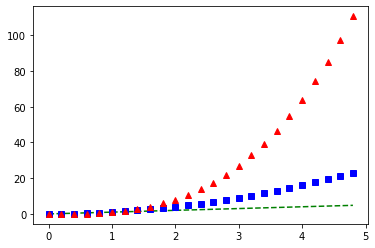

In [28]:
t=np.arange(0,5,0.2)
mplot.plot(t,t,'g--',t,t**2,'bs',t,t**3,'r^')
mplot.show()

## 2. Plot line1 and line2 with different styles: [4 points]

## line 1

x1 = [10,20,30]

y1 = [20,40,10]

## line 2

x2 = [10,20,30]

y2 = [40,10,30]

(1) Set the x and y axes labels as 'x' and 'y'; 

(2) Plot lines and/or markers to the Axes: blue, red; dotted, dashed;

(3) Set a title: "Plot with two or more lines with different styles";

(4) Show a legend on the plot as 'line1-dotted', 'line2-dashed

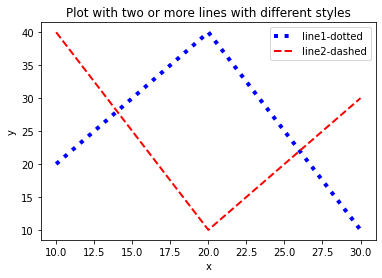

In [29]:
x1 = [10,20,30]
y1 = [20,40,10]
x2 = [10,20,30]
y2 = [40,10,30]
mplot.xlabel('x')
mplot.ylabel('y')
mplot.title("Plot with two or more lines with different styles")
mplot.plot(x1,y1,color='blue',linewidth=4,label='line1-dotted',linestyle='dotted')
mplot.plot(x2,y2, color='red',linewidth=2,label='line2-dashed',linestyle='dashed')
mplot.legend()
mplot.show()

## 3. Draw a scatter plot with empty circles taking a 50-point random distribution in X and Y; set X and Y as x- and y- axes lables; any color for face and edge, and plotted against each other. 

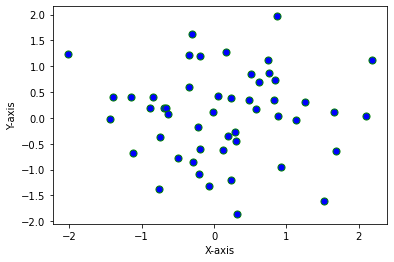

In [30]:
x=np.random.randn(50) 
y=np.random.randn(50)
mplot.scatter(x,y,s=50,facecolors='blue',edgecolors='green')
mplot.xlabel("X-axis")
mplot.ylabel("Y-axis")
mplot.show()

## 4. Create the following bar plot from the DataFrame. [4 points]

Input DataFrame:

  a b c d e

2 4,8,5,7,6

4 2,3,4,2,6

6 4,7,4,7,8

8 2,6,4,8,6

10 2,4,3,3,2

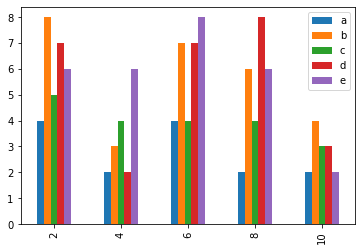

In [31]:
output=np.array([[4,8,5,7,6],[2,3,4,2,6],[4,7,4,7,8],[2,6,4,8,6],[2,4,3,3,2]])
dataFrame=pd.DataFrame(output,columns=['a','b','c','d','e'],index=[2,4,6,8,10])
dataFrame.plot(kind='bar')

mplot.show()

## 5.  The following dataset for average monthly precipitation.

Month    Precipitation (inches)

Jan      0.70

Feb      0.75

Mar      1.85

Apr      2.93

May      3.05

June     2.02

July     1.93

Aug      1.62

Sept     1.84

Oct      1.31

Nov      1.39

Dec      0.84

Create the following plot according to the above data.

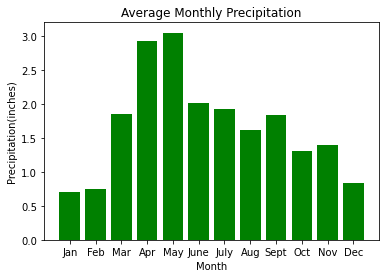

In [32]:
barPrecipitation=mplot.bar(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'], 
                [0.70,0.75,1.85,2.93,3.05,2.02,1.93,1.62,1.84,1.31,1.39,0.84],color='g')
mplot.xlabel("Month")
mplot.ylabel("Precipitation(inches)")
mplot.title("Average Monthly Precipitation")
mplot.show()